In [163]:
"""
Ben Christensen
"""
import numpy as np
import matplotlib.pyplot as plt

In [164]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [165]:
def euler(f,x0,h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #The first entry is always x0
    solution = [x0]
    h = 2/(t.shape[0]-1)
    x = x0
    #Perform Euler's method iteration by iteration
    for time in t[0:t.shape[0]-1]:
        x = x + h*f(x, time)
        solution.append(x)
        
    return np.array(solution)

In [166]:
#Define our function f and the analytic solution x(t)
def f(x,t): 
    return x - 2*t + 4

x = lambda t: -2 + 2*t + 2*np.e**t

In [167]:
#Prepare to graph several approximations with the analytical solution
x0 = np.array([0])
t = np.linspace(0, 2, 40)
h1, h2, h3 = 0.2, 0.1, 0.05
t = np.linspace(0,2,int(2/h1+1))
A1 = euler(f, x0, t)
t = np.linspace(0,2,int(2/h2+1))
A2 = euler(f, x0, t)
t = np.linspace(0,2,int(2/h3+1))
A3 = euler(f, x0, t)


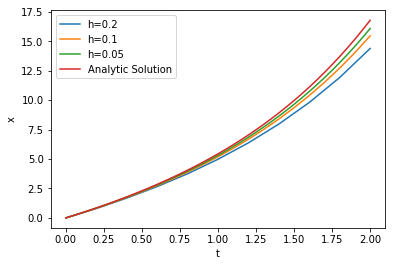

In [168]:
#Plot approximations with analytical solution
plt.plot(np.linspace(0,2, int(2/h1 + 1)), A1, label="h=0.2")
plt.plot(np.linspace(0,2, int(2/h2 + 1)), A2, label="h=0.1")
plt.plot(np.linspace(0,2, int(2/h3 + 1)), A3, label="h=0.05")
plt.plot(t,x(t), label="Analytic Solution")
plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.show()


## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [169]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    solution = [x0]
    x = x0
    #h is the step size = difference between each time period
    h = 2/(t.shape[0]-1)
    #Perform the midpoint method iteration by iteration
    for time in t[0:t.shape[0]-1]:
        x = x + h*f(x + (h/2)*f(x, time), time+(h/2))
        solution.append(x)
    
    return np.array(solution)
        
        

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    solution = [x0]
    x = x0
    h = t[1] - t[0]
    #Perform the Fourth-order Runge-Kutta method iteration by iteration
    for time in t[0:t.shape[0]-1]:
        K1 = f(x,time)
        K2 = f(x + h/2 * K1, time + h/2)
        K3 = f(x + h/2 * K2, time + h/2)
        K4 = f(x + h*K3, time+h)
        x = x + h/6 * (K1 + 2*K2 + 2*K3 + K4)
        solution.append(x)
    
    return np.array(solution)




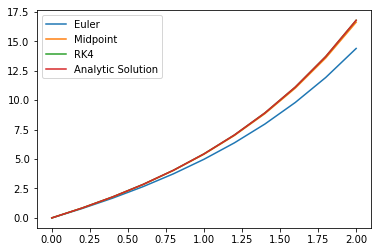

In [170]:
#Plot the different ordered methods against the analytical solution
h = 0.2
t = np.linspace(0,2,int(2/h+1))
plt.plot(t, euler(f,0,t), label="Euler")
plt.plot(t, midpoint(f,0,t), label="Midpoint")
plt.plot(t, rk4(f, 0, t), label="RK4")
plt.plot(t, x(t), label="Analytic Solution")
plt.legend()
plt.show()

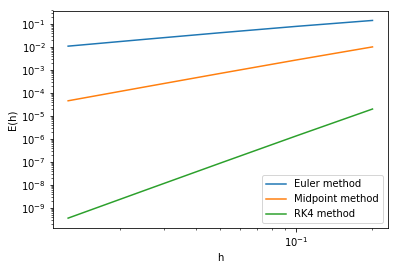

In [171]:
#Find the errors of each approximation
step_sizes = [0.2, 0.1, 0.05, 0.025, 0.0125]
e_error, m_error, r_error = [], [], []
#Error = |x(2) - xn|/|x(2)|
for h in step_sizes:
    t = np.linspace(0,2,int(2/h+1))
    e_error.append(abs(x(2) - euler(f,0,t)[-1]) / (abs(x(2))))
    m_error.append(abs(x(2) - midpoint(f,0,t)[-1]) / (abs(x(2))))
    r_error.append(abs(x(2) - rk4(f,0,t)[-1]) / (abs(x(2))))
#Plot the errors of each approximation on a log-log scale
plt.loglog(step_sizes, e_error, label="Euler method")
plt.loglog(step_sizes, m_error, label="Midpoint method")
plt.loglog(step_sizes, r_error, label="RK4 method")
plt.legend(loc="lower right")
plt.xlabel("h")
plt.ylabel("E(h)")
plt.show()
    


## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

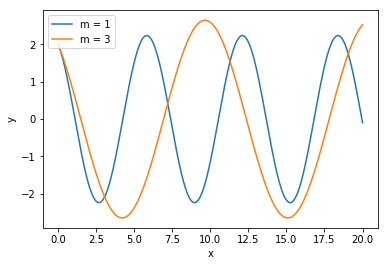

In [172]:
x0 = [2, -1]
m, k = 1, 1
h = .01
t = np.linspace(0,20,int(20/h+1))
#Create a new function f corresponding to x'(t)
f = lambda x,t: np.array([x[1], (-k/m)*x[0]])
#Plot the approximations with different values for m
plt.plot(t, rk4(f, x0, t)[:,0], label="m = 1")
#plt.plot(t, np.zeros_like(t))
m = 3
plt.plot(t, rk4(f,x0,t)[:,0], label="m = 3")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
                          

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

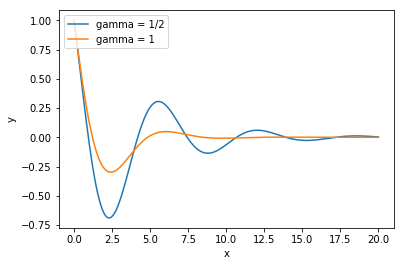

In [173]:
x0 = [1,-1]
gamma = 1/2
#Create a new function f corresponding to x'(t)
f = lambda x,t: np.array([x[1], (-gamma)*x[1]-x[0]])
#Plot approximations of the system with different values for gamma
plt.plot(t, rk4(f, x0, t)[:,0], label="gamma = 1/2")
gamma = 1
plt.plot(t, rk4(f,x0,t)[:,0], label="gamma = 1")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

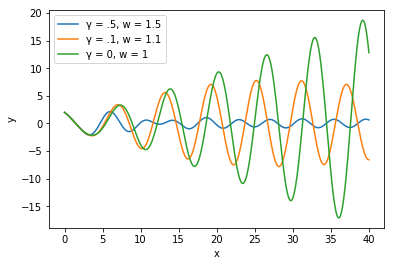

In [174]:
x0 = [2,-1]
h = .01
t = np.linspace(0,40,int(20/h+1))
gamma, w = 0.5, 1.5
#Create a new function f for the x'(t) from the system
f = lambda x,t: np.array([x[1], (-gamma/2)*x[1]-x[0]+np.cos(w*t)])
#Plot approximations of the solution to the system with different
#values of gamma and omega.
plt.plot(t, rk4(f, x0, t)[:,0], label="γ = .5, w = 1.5")
gamma, w = 0.1, 1.1
plt.plot(t, rk4(f, x0, t)[:,0], label="γ = .1, w = 1.1")
gamma, w = 0, 1
plt.plot(t, rk4(f, x0, t)[:,0], label="γ = 0, w = 1")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.show()